# Lab 10 MNIST and Softmax

## Lab10-4-mnist_nn_deep
### - activation fn : ReLU
### - weight initializer : Xavier
### - Accuracy = 0.9811  (오히려 약간 줄어듬...overfitting 때문..)

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
tf.set_random_seed(777)  # reproducibility

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [6]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
# 5개 layer & layer의 변수 512개로 늘림
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

In [7]:
W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

In [8]:
W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

In [9]:
W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

In [10]:
W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [11]:
# define cost/loss & optimizer (using AdamOptimizer)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
# Session 생성 및 변수 initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.296483150
Epoch: 0002 cost = 0.104406800
Epoch: 0003 cost = 0.070662051
Epoch: 0004 cost = 0.051252026
Epoch: 0005 cost = 0.037983440
Epoch: 0006 cost = 0.034874982
Epoch: 0007 cost = 0.030717032
Epoch: 0008 cost = 0.025697561
Epoch: 0009 cost = 0.021935539
Epoch: 0010 cost = 0.021127864
Epoch: 0011 cost = 0.018186909
Epoch: 0012 cost = 0.016460486
Epoch: 0013 cost = 0.018914573
Epoch: 0014 cost = 0.015017020
Epoch: 0015 cost = 0.014418301
Learning Finished!


In [14]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9811


In [15]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Label:  [8]
Prediction:  [8]


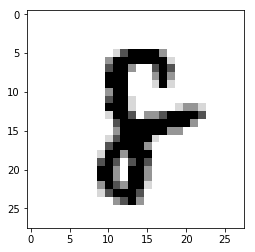

'\nEpoch: 0001 cost = 0.266061549\nEpoch: 0002 cost = 0.080796588\nEpoch: 0003 cost = 0.049075800\nEpoch: 0004 cost = 0.034772298\nEpoch: 0005 cost = 0.024780529\nEpoch: 0006 cost = 0.017072763\nEpoch: 0007 cost = 0.014031383\nEpoch: 0008 cost = 0.013763446\nEpoch: 0009 cost = 0.009164047\nEpoch: 0010 cost = 0.008291388\nEpoch: 0011 cost = 0.007319742\nEpoch: 0012 cost = 0.006434021\nEpoch: 0013 cost = 0.005684378\nEpoch: 0014 cost = 0.004781207\nEpoch: 0015 cost = 0.004342310\nLearning Finished!\nAccuracy: 0.9742\n'

In [16]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

'''
Epoch: 0001 cost = 0.266061549
Epoch: 0002 cost = 0.080796588
Epoch: 0003 cost = 0.049075800
Epoch: 0004 cost = 0.034772298
Epoch: 0005 cost = 0.024780529
Epoch: 0006 cost = 0.017072763
Epoch: 0007 cost = 0.014031383
Epoch: 0008 cost = 0.013763446
Epoch: 0009 cost = 0.009164047
Epoch: 0010 cost = 0.008291388
Epoch: 0011 cost = 0.007319742
Epoch: 0012 cost = 0.006434021
Epoch: 0013 cost = 0.005684378
Epoch: 0014 cost = 0.004781207
Epoch: 0015 cost = 0.004342310
Learning Finished!
Accuracy: 0.9742
'''
